In [29]:
import tensorflow 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tensorflow.keras import layers, models ,datasets

In [16]:
#https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [58]:
X_train[0].shape

(32, 32, 3)

In [7]:
Y_test.shape

(10000, 1)

In [13]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [17]:
Y_train=Y_train.reshape(Y_train.shape[0],)
Y_test=Y_test.reshape(Y_test.shape[0],)

In [ ]:
print(Y_train.shape ,  Y_test.shape)

(50000,) (10000,)


In [19]:
def plot_image(X,Y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

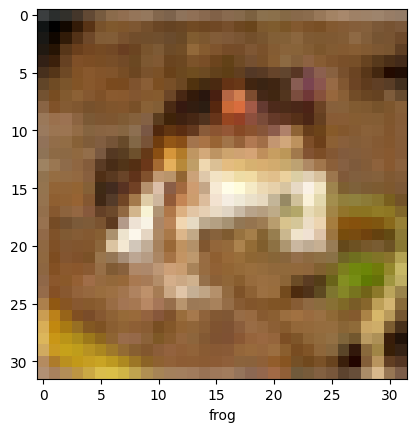

In [20]:
plot_image(X_train,Y_train,0)

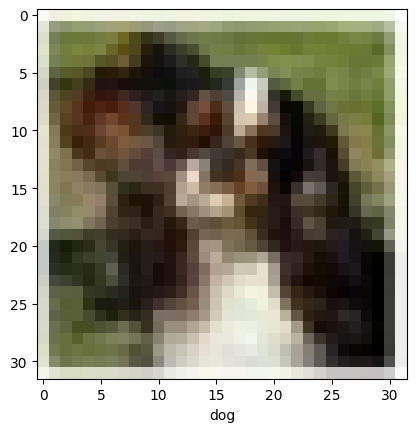

In [21]:
plot_image(X_train,Y_train,500)

In [22]:
#Normalizing the dataset
X_train=X_train/255
X_test = X_test/255

first lets build an simple ANN and check its performance and check if implementing a CNN will increase the performnace or not

In [26]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam as ADAM
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define the ANN model
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),        # Flatten 32x32 RGB image
    layers.Dense(3000, activation='relu'),         # First dense hidden layer
    layers.Dense(1000, activation='relu'),         # Second dense hidden layer
    layers.Dense(10, activation='softmax')         # Output layer for 10 classes
])

# Compile the model
ann.compile(
    optimizer=ADAM(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy,
    metrics=['accuracy']
)

# Train the model
ann.fit(X_train, Y_train, epochs=5)


c:\Users\singer\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.2740 - loss: 2.2021
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.3890 - loss: 1.6913
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.4302 - loss: 1.5832
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.4512 - loss: 1.5263
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 62ms/step - accuracy: 0.4676 - loss: 1.4892


In [30]:
from sklearn.metrics import classification_report
from tensorflow.math import confusion_matrix


In [40]:
Y_predicted_new=np.zeros(Y_test.shape[0])
Y_predicted=ann.predict(X_test)
for i in range(Y_test.shape[0]):
    Y_predicted_new[i]=np.argmax(Y_predicted[i])
print(Y_predicted_new.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(10000,)


In [41]:
print(classification_report(Y_test,Y_predicted_new))

              precision    recall  f1-score   support

           0       0.64      0.38      0.48      1000
           1       0.53      0.68      0.60      1000
           2       0.28      0.44      0.35      1000
           3       0.32      0.35      0.34      1000
           4       0.38      0.35      0.37      1000
           5       0.41      0.37      0.39      1000
           6       0.44      0.59      0.51      1000
           7       0.67      0.39      0.49      1000
           8       0.56      0.65      0.61      1000
           9       0.65      0.37      0.47      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.46     10000
weighted avg       0.49      0.46      0.46     10000



Text(33.22222222222222, 0.5, 'True')

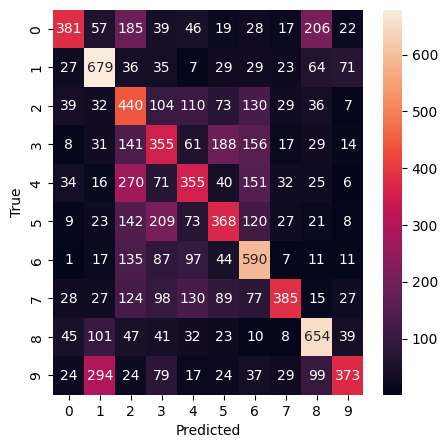

In [44]:
import seaborn as sn

cm=confusion_matrix(Y_test,Y_predicted_new)
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [60]:
from tensorflow.keras.activations import relu, softmax

cnn = models.Sequential([
    #cnn
     
    layers.Conv2D(filters=32,activation=relu,kernel_size=(3,3),input_shape=(32,32,3)), # Convolutional layer
    layers.MaxPooling2D((2,2)), # Pooling layer
    
    #cnn
    layers.Conv2D(filters=64,activation=relu,kernel_size=(3,3)), # Convolutional layer
    layers.MaxPooling2D((2,2)), # Pooling layer
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation=relu),         # First dense hidden layer
    layers.Dense(10, activation=softmax)         # Output layer for 10 classes
])

c:\Users\singer\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
cnn.compile(optimizer=ADAM(learning_rate=0.001),
            loss=SparseCategoricalCrossentropy)

In [62]:
cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.7943
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.7512
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.7041
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.6724
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.6338
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.6021
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.5731
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.5405
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.5194
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.4895


In [66]:
Y_predicted_new=np.zeros(Y_test.shape[0])
Y_predicted=cnn.predict(X_test)
for i in range(Y_test.shape[0]):
    Y_predicted_new[i]=np.argmax(Y_predicted[i])    

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [67]:
print(classification_report(Y_test, Y_predicted_new))

              precision    recall  f1-score   support

           0       0.60      0.77      0.67      1000
           1       0.78      0.81      0.79      1000
           2       0.67      0.47      0.55      1000
           3       0.48      0.49      0.49      1000
           4       0.69      0.56      0.62      1000
           5       0.61      0.57      0.59      1000
           6       0.70      0.83      0.76      1000
           7       0.77      0.71      0.74      1000
           8       0.69      0.84      0.76      1000
           9       0.79      0.71      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



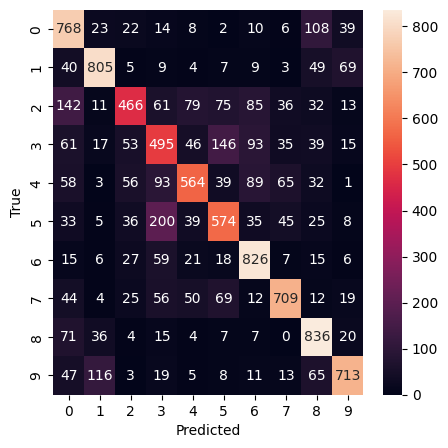

In [65]:
cm=confusion_matrix(Y_test,Y_predicted_new)
plt.figure(figsize=(5,5))   
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
array=[int(Y_predicted_new[i]) for i in range(Y_predicted_new.shape[0] )]
Y_predicted_new=np.array(array)

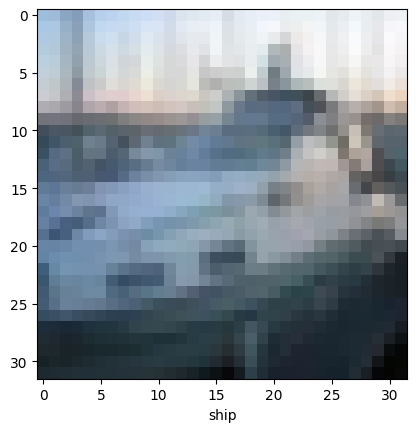

In [76]:
plot_image(X_test,Y_predicted_new,2)